In [1]:
from keras.models import *
from keras.layers import *
from keras.losses import *
from keras.optimizers import *
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data = pd.read_csv("../dataset/mnist_train_small.csv").values

In [3]:
X, y = data[:, 2:], data[:, 1:2]

In [4]:
X_mod = X.reshape(-1, 28, 28, 1)

In [5]:
print(X.shape, X_mod.shape)

(8000, 784) (8000, 28, 28, 1)


In [6]:
y_hot = to_categorical(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X_mod, y_hot, test_size=0.33, random_state=42)

In [10]:
input = Input((28, 28, 1))
c1 = Conv2D(64, (3, 3), activation="relu")(input)
m1 = MaxPool2D((2, 2))(c1)

c2 = Conv2D(128, (3, 3) , activation="relu")(m1)
m2 = MaxPool2D((2, 2))(c2)

f1 = Flatten()(m2)

d1 = Dense(500, activation="tanh")(f1)
d2 = Dense(100, activation="tanh")(d1)
out = Dense(10, activation="softmax")(d2)

model = Model(inputs = [input], outputs = [out])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               1600500   
__________

In [11]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
hist = model.fit(X_train, y_train, epochs=2, batch_size=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
5360/5360 [==============================] - 9s 2ms/step - loss: 1.2686 - acc: 0.6541
Epoch 2/2
5360/5360 [==============================] - 8s 1ms/step - loss: 0.4782 - acc: 0.8864


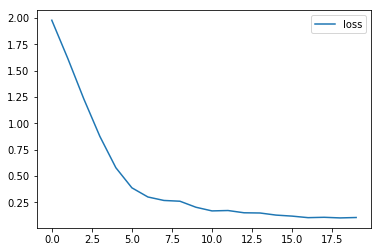

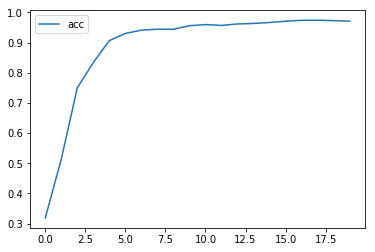

In [15]:
plt.figure(1)

plt.plot(hist.history["loss"], label="loss")
plt.legend()

plt.figure(2)
plt.plot(hist.history["acc"], label="acc")
plt.legend()


In [16]:
np.argmax(model.predict(X_test[:10]), axis=1)

array([9, 1, 4, 8, 0, 8, 2, 2, 4, 8])

In [17]:
np.argmax(y_test[:10], axis=1)

array([9, 1, 4, 8, 0, 8, 2, 2, 4, 8])

In [18]:
model.evaluate(X_test, y_test)[1]

2640/2640 [==============================] - 0s 176us/step


0.9598484848484848

In [13]:
model.layers

In [14]:
m2 = Model(inputs = [model.input], outputs=[model.layers[1].output])

In [15]:
m2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
Total params: 640
Trainable params: 640
Non-trainable params: 0
_________________________________________________________________


In [16]:
m2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:
result = m2.predict(X_train[0:1])

In [18]:
result.shape

(1, 26, 26, 64)

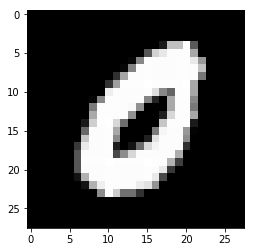

In [19]:
plt.imshow(X_train[0:1].reshape(28, 28), cmap="gray")

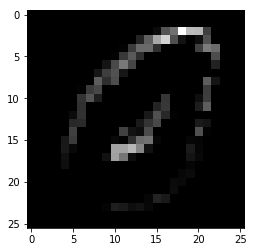

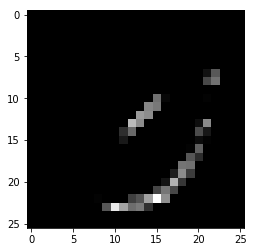

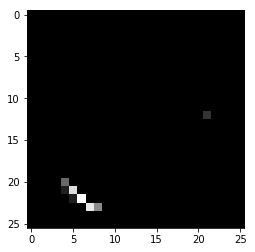

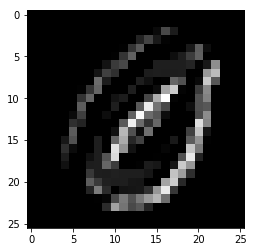

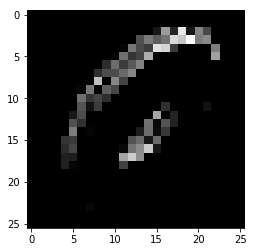

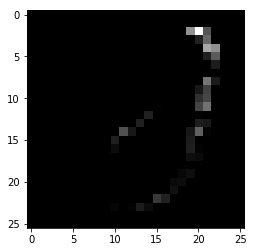

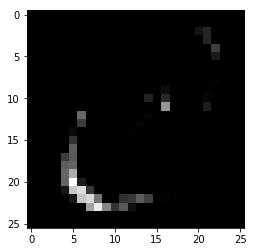

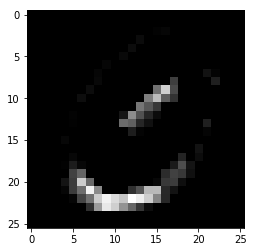

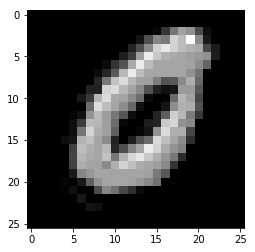

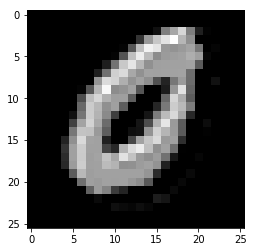

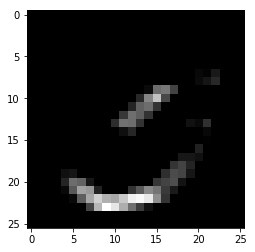

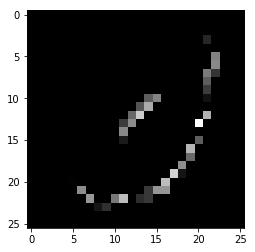

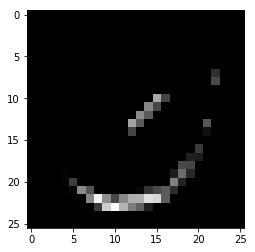

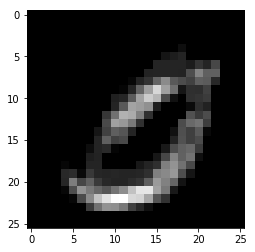

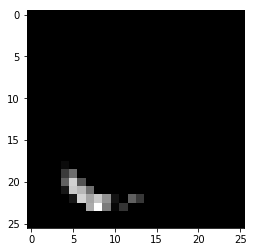

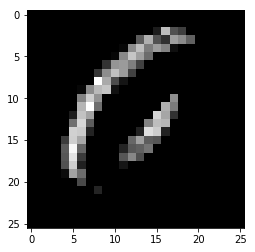

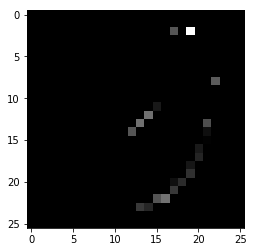

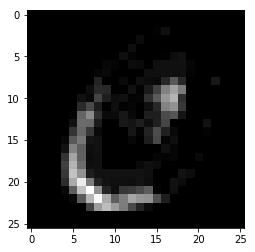

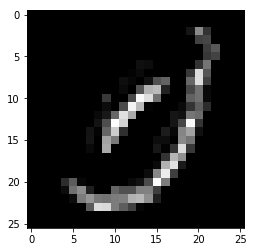

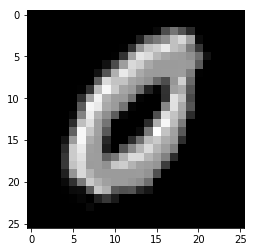

In [21]:
for i in range(20):
    img = result[0, :, :, i].reshape(26, 26)
    plt.figure(i)
    plt.imshow(img, cmap="gray")